In [1]:
import pandas as pd

# Load the Excel file
file_path = '/Users/mandarmp/Documents/wildtype/MEA Primary Neuron Assays.xlsx'
excel_data = pd.ExcelFile(file_path)

# Get the sheet names
sheet_names = excel_data.sheet_names
print(f"sheet names : [{sheet_names}]")
# Read data from each sheet
data = {}
for sheet_name in sheet_names:
    data[sheet_name] = excel_data.parse(sheet_name)  # Read the sheet data into a DataFrame

# Access the data from a specific sheet
sheet1_data = data['ADNP']


sheet names : [['ASRat', 'AS Activity Graph', 'Syngap Mouse', 'B6J Baseline', 'Syngap Mouse 2', 'AS mouse', 'AS mouse 2', 'Syngap 3', 'CDKL5', 'CNKSR2', 'KCNT1', 'CDKL5_2', 'ADNP']]


In [2]:
pd.set_option('display.max_columns', None)
display(sheet1_data)

,Date,Div,Assay,Run #,Chip #,Chip ID,Neuron Source,Comment,Chip Number,Chip ID.1,Genotype,comments,Date.1,DIV,1WT,2 WT,3 WT,4 WT,5 WT,6 WT,7 HET,8 HET,9 HET,10 HET,11 HET,12 HET,avg wt,avg het,het diff,Recordings completed
0,2023-05-10,5,Sparse 7x,1,1,16378,WT cortex,NaN,1,16378,WT cortex,NaN,2023-05-10,5.0,1.15,0.98,0.53,1.88,1.82,1.00,3.18,3.48,4.64,5.23,3.76,4.67,1.226667,4.160000,-2.933333,"sparse 7x, Net today"
1,2023-05-10,5,Network Today,3,1,16378,WT cortex,NaN,2,16665,WT cortex,NaN,2023-05-16,11.0,2.09,3.48,2.56,5.92,6.52,1.79,16.12,5.85,3.82,19.76,11.30,22.21,3.726667,13.176667,-9.450000,"sparse 7x, Net today,last"
2,2023-05-10,5,Sparse 7x,4,2,16665,WT cortex,NaN,3,16384,WT cortex,NaN,2023-05-19,14.0,1.61,4.18,3.55,5.82,6.86,1.92,16.91,5.52,3.71,25.15,14.41,22.03,3.990000,14.621667,-10.631667,"sparse 7x, Net today,last"
3,2023-05-10,5,Network Today,5,2,16665,WT cortex,NaN,4,16861,WT cortex,NaN,2023-05-23,18.0,1.76,2.94,2.65,2.56,6.42,1.73,19.52,6.67,4.20,28.24,19.61,25.56,3.010000,17.300000,-14.290000,"sparse 7x, Net today,last"
4,2023-05-10,5,Sparse 7x,6,3,16384,WT cortex,NaN,5,16856,WT cortex,NaN,2023-05-26,21.0,NaN,NaN,NaN,NaN,NaN,NaN,21.52,6.94,5.71,30.52,19.14,22.44,NaN,17.711667,NaN,"sparse 7x, Net today/best, last"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2023-05-31,16,Network today,188,11,16821,HET cortex,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,2023-05-31,16,Network best/last,189,11,16821,HET cortex,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,2023-05-31,16,Sparse 7x,190,12,16848,HET cortex,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,2023-05-31,16,Network today,191,12,16848,HET cortex,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
filtered_df = sheet1_data.filter(like='WT').join(sheet1_data['DIV'])
filtered_df=filtered_df.dropna()
display(filtered_df)

,1WT,2 WT,3 WT,4 WT,5 WT,6 WT,DIV
0,1.15,0.98,0.53,1.88,1.82,1.00,5.0
1,2.09,3.48,2.56,5.92,6.52,1.79,11.0
2,1.61,4.18,3.55,5.82,6.86,1.92,14.0
3,1.76,2.94,2.65,2.56,6.42,1.73,18.0


Text(0.5, 0, 'DIV')

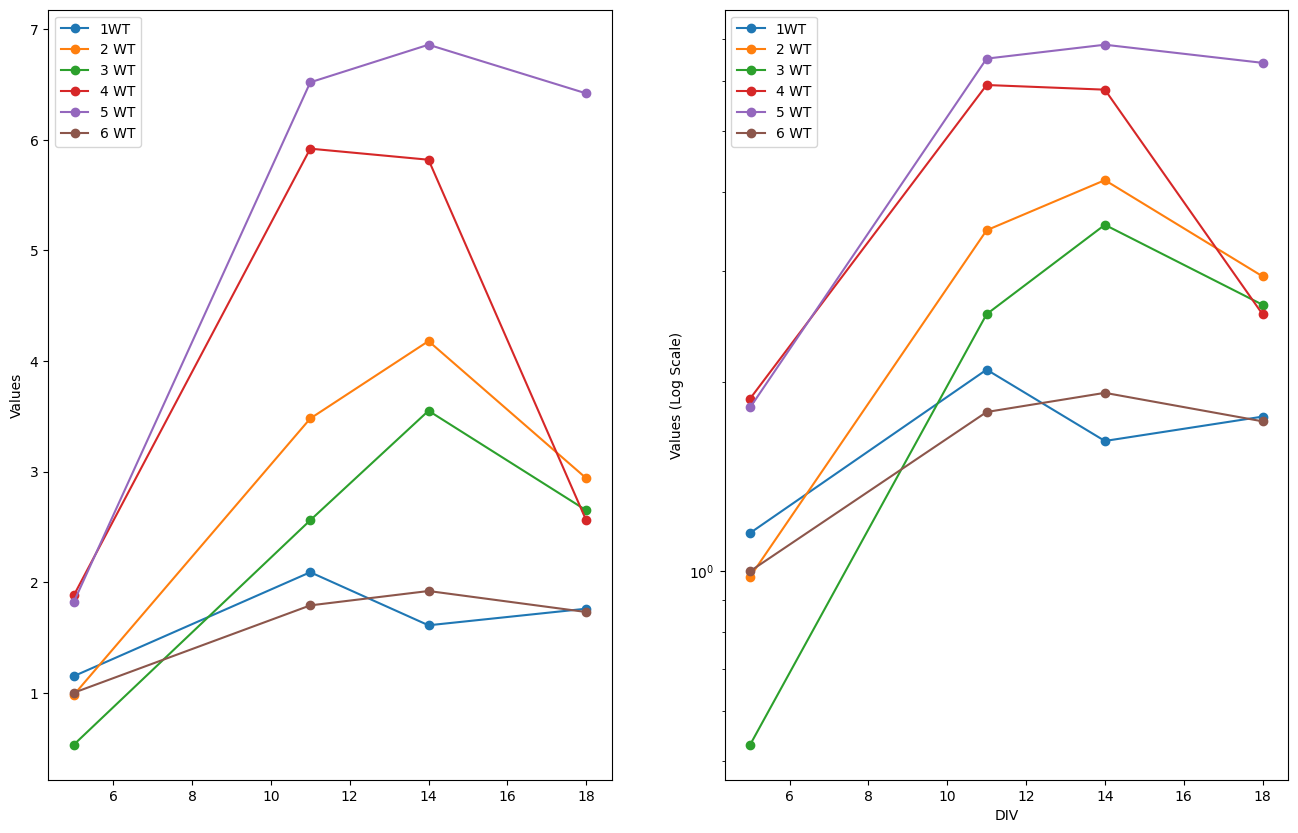

In [5]:
import matplotlib.pyplot as plt
x = filtered_df['DIV']
columns = filtered_df.columns.drop('DIV')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True,figsize=(16, 10))

# Plot each column against the "DIV" column in the first subplot
for column in columns:
    y = filtered_df[column]
    ax1.plot(x, y, marker='o', label=column)

# Set the y-axis of the first subplot to linear scale
ax1.set_yscale('linear')
ax1.set_ylabel('Values')
ax1.legend()

# Plot each column against the "DIV" column in the second subplot with a log scale
for column in columns:
    y = filtered_df[column]
    ax2.plot(x, y, marker='o', label=column)

# Set the y-axis of the second subplot to log scale
ax2.set_yscale('log')
ax2.set_ylabel('Values (Log Scale)')
ax2.legend()

# Set the x-axis label
plt.xlabel('DIV')

In [6]:
import numpy as np
def plot_wildtypes(data, type):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(16, 10))
    
    # Initialize an empty list to collect the legend handles and labels
    legend_handles = []
    legend_labels = []
    
    # Iterate over the datasets and plot them with different colors
    colors = iter(plt.cm.tab10(np.linspace(0, 1, len(type))))
    for i in range(len(type)):
        # Extract the DIV and column values
        sheet = data[type[i]]
        filtered_df = sheet.filter(like='WT').join(sheet['DIV'])
        filtered_df=filtered_df.dropna()    
        x = filtered_df['DIV']
        columns = filtered_df.columns.drop('DIV')
        
        # Get the color for the current dataset
        color = next(colors)
        
        # Plot each column against the "DIV" column in the first subplot
        for column in columns:
            y = filtered_df[column]
            line, = ax1.plot(x, y, marker='o', color=color)
            # Add the line handle and label to the legend lists only for the first iteration
    
        
        # Plot each column against the "DIV" column in the second subplot with a log scale
        for column in columns:
            y = filtered_df[column]
            line, = ax2.plot(x, y, marker='o', color=color)
            # Add the line handle and label to the legend lists only for the first iteration
            
        legend_handles.append(line)
        legend_labels.append(type[i])
    
    # Set the y-axis of the first subplot to linear scale
    ax1.set_yscale('linear')
    ax1.set_ylabel('Values')
    
    # Set the y-axis of the second subplot to log scale
    ax2.set_yscale('log')
    ax2.set_ylabel('Values (Log Scale)')
    
    # Create a single legend using the collected handles and labels
    fig.legend(legend_handles, legend_labels, loc='upper right')
    
    # Set the x-axis label
    plt.xlabel('DIV')
    
    # Set the figure title
    fig.suptitle(type)
    
    # Show the plot
    plt.show()


In [13]:
data = {'1WT': [1.15, 2.09, 1.61, 1.76],
        '2 WT': [0.98, 3.48, 4.18, 2.94],
        '3 WT': [0.53, 2.56, 3.55, 2.65],
        '4 WT': [1.88, 5.92, 5.82, 2.56],
        '5 WT': [1.82, 6.52, 6.86, 6.42],
        '6 WT': [1.0, 1.79, 1.92, 1.73],
        'DIV': [5.0, 11.0, 14.0, 18.0]}

df = pd.DataFrame(data)
display(df)
y = df[df.columns[1]]
print(y.iloc[2])

,1WT,2 WT,3 WT,4 WT,5 WT,6 WT,DIV
0,1.15,0.98,0.53,1.88,1.82,1.00,5.0
1,2.09,3.48,2.56,5.92,6.52,1.79,11.0
2,1.61,4.18,3.55,5.82,6.86,1.92,14.0
3,1.76,2.94,2.65,2.56,6.42,1.73,18.0


4.18


In [10]:
import numpy as np
def plot_wildtypes(data, type):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(16, 10))
    
    # Initialize an empty list to collect the legend handles and labels
    legend_handles = []
    legend_labels = []
    
    # Iterate over the datasets and plot them with different colors
    #colors = iter(plt.cm.tab10(np.linspace(0, 1, len(type))))
    # Range list with corresponding colors
    range_list = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [7, 8], [8, 9], [9, 10],
              [10, 12.5], [12.5, 15], [15, 17.5], [17.5, 20], [20, 25], [25, 30],
              [30, 40], [40, 100]]
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan',
              'magenta', 'yellow', 'lightblue', 'lightgreen', 'lightcoral', 'lightsalmon',
              'lightgray', 'lightpink']

    for i in range(len(type)):
        # Extract the DIV and column values
        print(type[i])
        sheet = data[type[i]]
        filtered_df = sheet.filter(like='WT').join(sheet['DIV'])
        filtered_df=filtered_df.dropna()    
        # Extract rows with DIV values of 5.0 or 6.0
        tempdf = filtered_df[filtered_df['DIV'].isin([5.0, 6.0])]
        x = filtered_df['DIV']
        for column in filtered_df.columns[:-1]:
            y = filtered_df[column]
            value = tempdf[column]
            color = None
            for i, r in enumerate(range_list):
                if r[0] <= value.iloc[0] < r[1]:
                    color = colors[i]
                    break
            line, = ax1.plot(x, y, marker='o', color=color)
            # Add the line handle and label to the legend lists only for the first iteration
    
        
        # Plot each column against the "DIV" column in the second subplot with a log scale
        for column in filtered_df.columns[:-1]:
            y = filtered_df[column]
            line, = ax2.plot(x, y, marker='o', color=color)
            # Add the line handle and label to the legend lists only for the first iteration
            
        #legend_handles.append(line)
        #legend_labels.append(f"[{r[0]},{r[1]}]")
    
    # Set the y-axis of the first subplot to linear scale
    ax1.set_yscale('linear')
    ax1.set_ylabel('Values')
    
    # Set the y-axis of the second subplot to log scale
    ax2.set_yscale('log')
    ax2.set_ylabel('Values (Log Scale)')
    
    # Create a single legend using the collected handles and labels
    fig.legend(legend_handles, legend_labels, loc='upper right')
    
    # Set the x-axis label
    plt.xlabel('DIV')
    
    # Set the figure title
    fig.suptitle(type)
    
    # Show the plot
    plt.show()


Syngap Mouse
B6J Baseline
Syngap Mouse 2
AS mouse
AS mouse 2


IndexError: single positional indexer is out-of-bounds

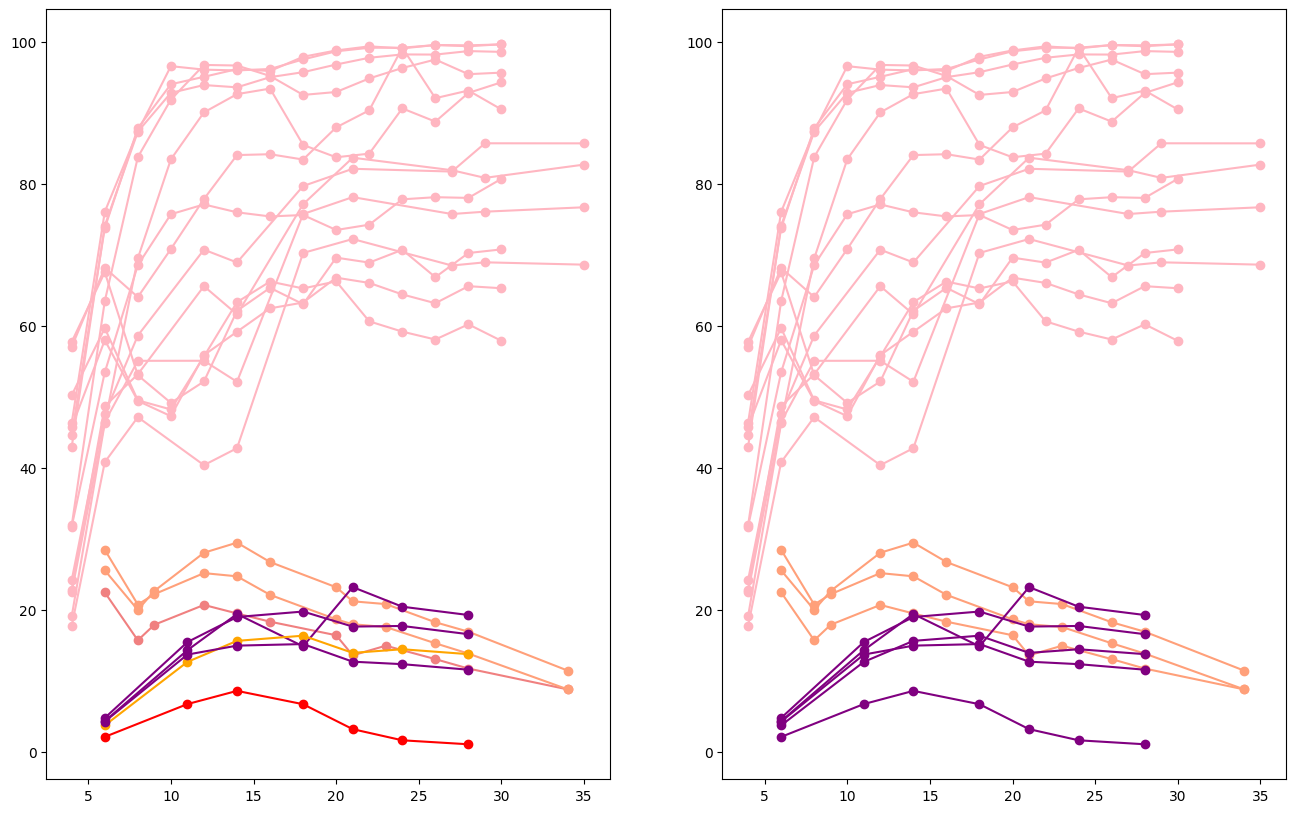

In [11]:

types = ['Syngap Mouse', 'B6J Baseline', 'Syngap Mouse 2', 'AS mouse', 'AS mouse 2', 'Syngap 3', 'CDKL5', 'CNKSR2', 'KCNT1', 'CDKL5_2', 'ADNP']

plot_wildtypes(data,types)

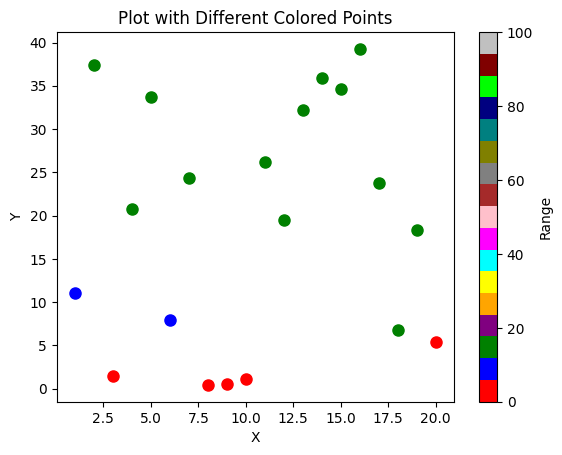

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Example data
x = np.arange(1, 21)
y = np.random.uniform(0, 40, size=20)

# Range list with corresponding range values
range_list = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [7, 8], [8, 9], [9, 10],
              [10, 12.5], [12.5, 15], [15, 17.5], [17.5, 20], [20, 25], [25, 30], [30, 40], [40, 100]]

# Create a colormap with a range of colors
cmap = ListedColormap(['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'cyan',
                       'magenta', 'pink', 'brown', 'gray', 'olive', 'teal', 'navy',
                       'lime', 'maroon', 'silver'])

# Normalize the range values to the colormap scale
norm = plt.Normalize(min([r[0] for r in range_list]), max([r[1] for r in range_list]))

# Plotting
fig, ax = plt.subplots()
for i in range(len(x)):
    value = y[i]
    
    # Find the index of the corresponding range value
    for j in range(len(range_list)):
        if range_list[j][0] <= value < range_list[j][1]:
            index = j
            break
    
    # Plot the point with the assigned color based on the index
    ax.plot(x[i], y[i], marker='o', markersize=8, color=cmap(norm(index)))

# Set x-axis and y-axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set plot title
ax.set_title('Plot with Different Colored Points')

# Create a colorbar for the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Range')

# Display the plot
plt.show()


In [21]:
# Example DataFrame
data = {'1WT': [1.15, 2.09, 1.61, 1.76],
        '2 WT': [0.98, 3.48, 4.18, 2.94],
        '3 WT': [0.53, 2.56, 3.55, 2.65],
        '4 WT': [1.88, 5.92, 5.82, 2.56],
        '5 WT': [1.82, 6.52, 6.86, 6.42],
        '6 WT': [1.00, 1.79, 1.92, 1.73],
        'DIV': [5.0, 11.0, 14.0, 18.0]}

df = pd.DataFrame(data)

# Extract rows with DIV values of 5.0 or 6.0
filtered_df = df[df['DIV'].isin([5.0, 6.0])]

column_names = filtered_df.columns.drop('DIV')

print(column)

# Store column values in a single list
column_values = [value for column in column_names for value in filtered_df[column]]


print(column_values)

Index(['1WT', '2 WT', '3 WT', '4 WT', '5 WT', '6 WT'], dtype='object')
[1.15, 0.98, 0.53, 1.88, 1.82, 1.0]
